In [1062]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

In [853]:
%matplotlib inline

In [854]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [855]:
# Load training data
df = pd.read_csv("C:/Users/user/OneDrive - Bar-Ilan University - Students/Documents/Data_mining/Final_Project/hotels_train.csv")

Exploring data:

In [856]:
print("Shape: ", df.shape)
df.head()

Shape:  (27213, 18)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [857]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [858]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


In [859]:
for col in df.columns:
    print(col, ': ', df[col].unique())

ID :  ['INN09588' 'INN07691' 'INN32192' ... 'INN22554' 'INN33957' 'INN31744']
weekend_nights :  [1 0 2 3 4 5 6 7]
week_nights :  [ 5  3  2  4  1  0  7  6 12 10  8  9 15 11 13 14 16 17]
room_type :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']
board_type :  ['half board' nan 'full board' 'breakfast' 'not selected']
n_adults :  [2 1 3 0 4]
n_less_12 :  [0 1 2 3 6]
n_more_12 :  [0 1 2 3 4]
booked_tour :  [0 1]
n_requests :  [2 0 1 3 5 4]
lead_time :  [ 34. 365. 148. 502.  32. 414. 168.  92.   9. 180. 309.   6.  23.  39.
 102.  27. 111.  50. 129.  75. 232. 335. 280. 178. 124.  93.  54. 266.
 137.  83.  64.   5.   2. 130. 336.  40.   4. 101. 108.  20.  17. 113.
  10. 138. 328.  69.  45.  98.  18. 147.   0. 256.  12. 321. 260.  36.
  42. 318. 114.  62.   3. 144. 387. 172. 231. 298.  33.  29. 122.  nan
 297.  14.  52. 226.  81.  35. 351. 230.  90. 362. 149.  68. 162. 245.
 216.  26. 106. 195.  15. 134. 363.  94. 332.  57.  58.  38. 141. 

In [860]:
numeric_col = df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price', 'is_canceled'],
      dtype='object')

In [861]:
nominal_data = df.drop(numeric_col, axis=1)
nominal_data

,ID,room_type,board_type,purchase_type,date
0,INN09588,Room_Type 1,half board,Online,11/28/2018
1,INN07691,Room_Type 1,NaN,NaN,11/03/2018
2,INN32192,Room_Type 4,half board,Online,05/06/2018
3,INN32218,Room_Type 1,NaN,Offline,9/26/2018
4,INN02994,Room_Type 4,half board,Offline,10/19/2017
...,...,...,...,...,...
27208,INN09056,Room_Type 1,NaN,NaN,7/18/2018
27209,INN24796,Room_Type 1,half board,Online,2/24/2018
27210,INN22554,Room_Type 1,NaN,Offline,4/15/2018
27211,INN33957,Room_Type 4,half board,Aviation,5/22/2018


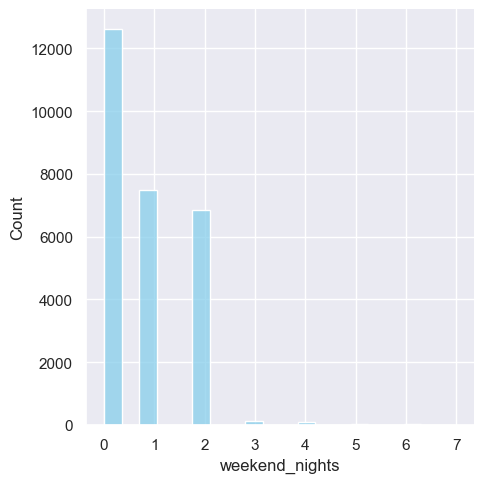

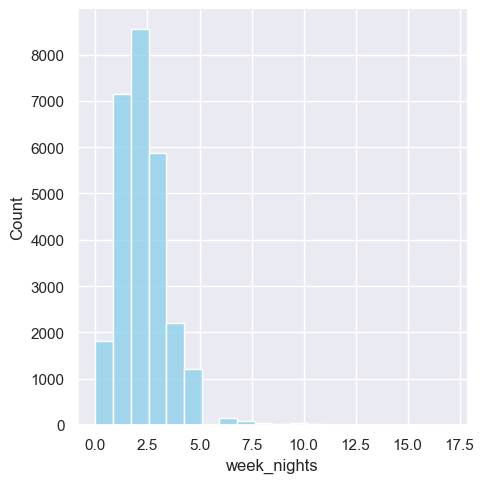

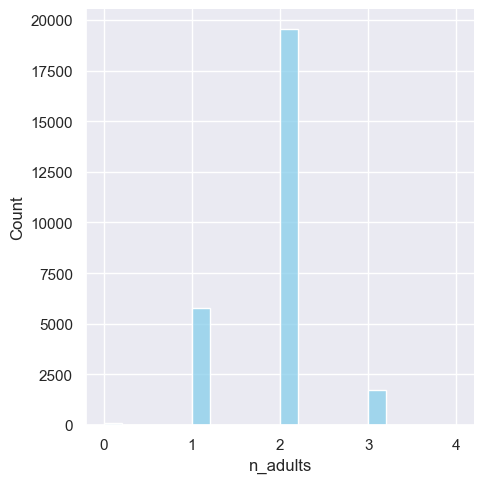

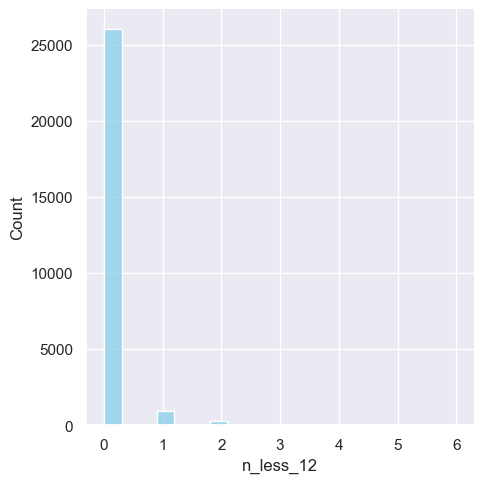

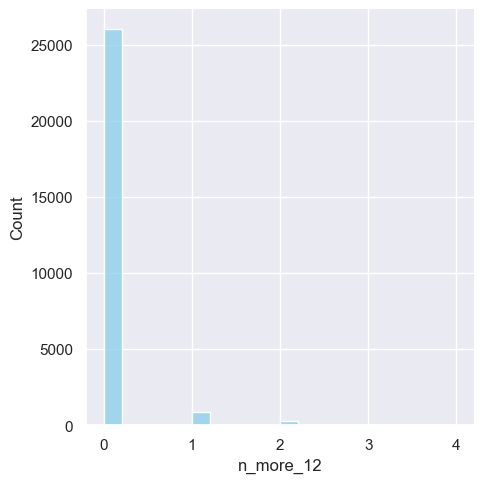

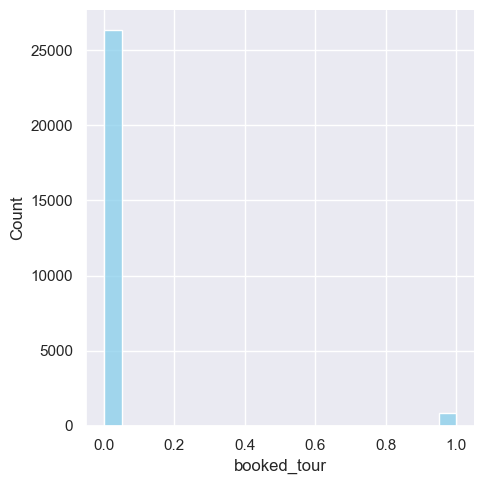

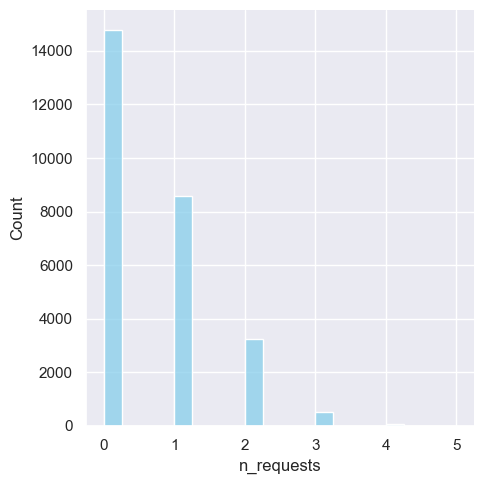

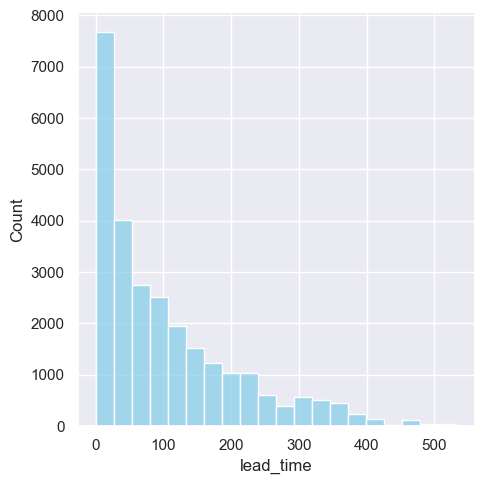

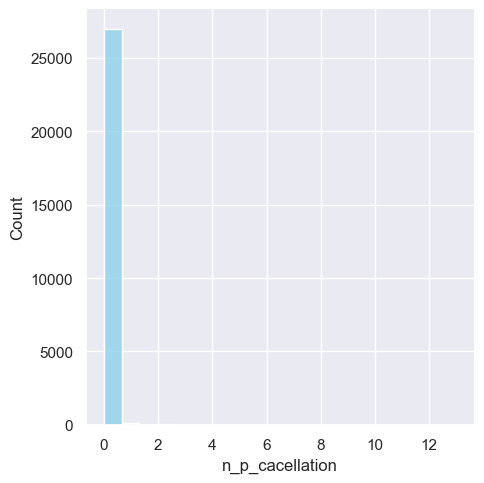

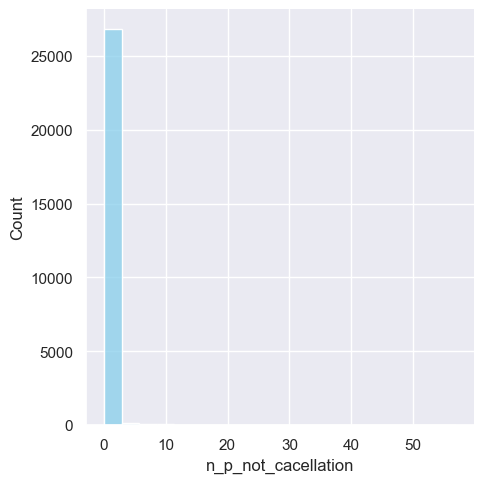

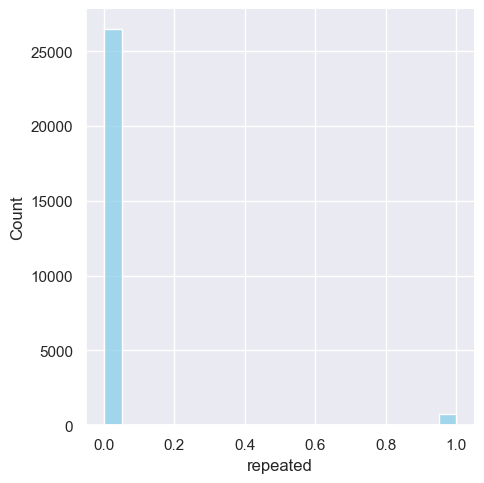

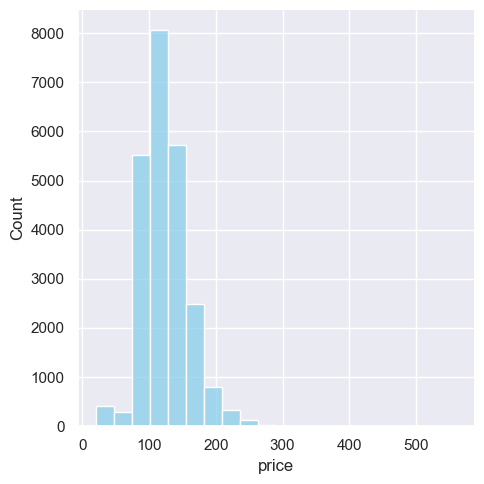

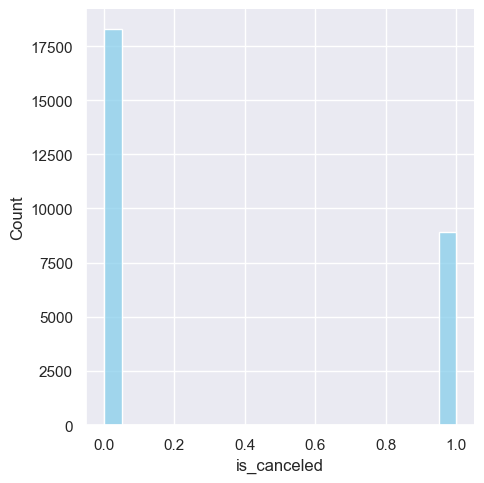

In [862]:
for col in numeric_col:
    sns.displot(df[col], bins=20, color='skyblue')

Fixing date column and splitting into three separate columns - day, month, year

In [863]:
data = df
invalid_date_rows = data[data['date'] == '2018-2-29']
data['date'] = df['date'].replace('2018-2-29','02/28/2018')
data['date'].unique()


data['date']= pd.to_datetime(data['date'], format='%m/%d/%Y',errors='coerce')
data['date'].dtype

df['month'] = data['date'].dt.month
df['day'] = data['date'].dt.day
df['year'] = data['date'].dt.year
data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,2018-11-28,0,11,28,2018
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,...,NaN,0,0,0,NaN,2018-11-03,1,11,3,2018
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,2018-05-06,0,5,6,2018
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,127.0,2018-09-26,1,9,26,2018
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,2017-10-19,0,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,Room_Type 1,NaN,3,0,0,0,1,...,NaN,0,0,0,NaN,2018-07-18,0,7,18,2018
27209,INN24796,0,4,Room_Type 1,half board,2,0,0,0,1,...,Online,0,0,0,113.0,2018-02-24,0,2,24,2018
27210,INN22554,0,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,105.0,2018-04-15,1,4,15,2018
27211,INN33957,1,0,Room_Type 4,half board,1,0,0,0,0,...,Aviation,0,0,0,130.0,2018-05-22,1,5,22,2018


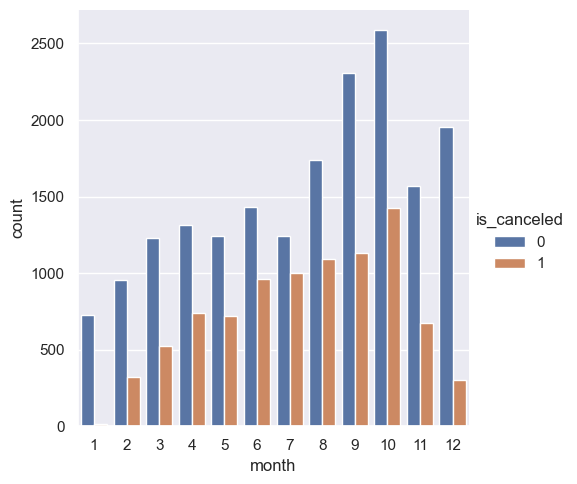

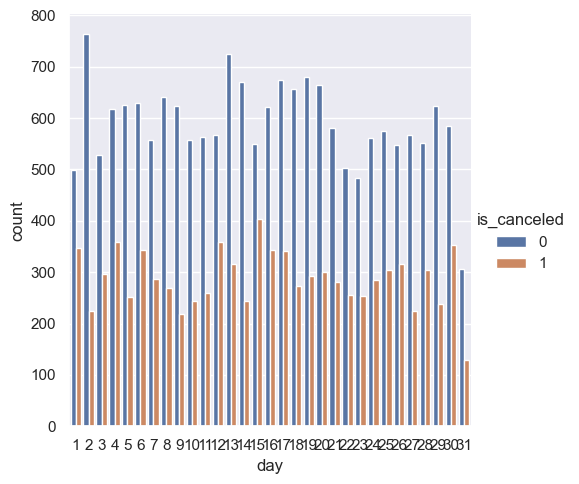

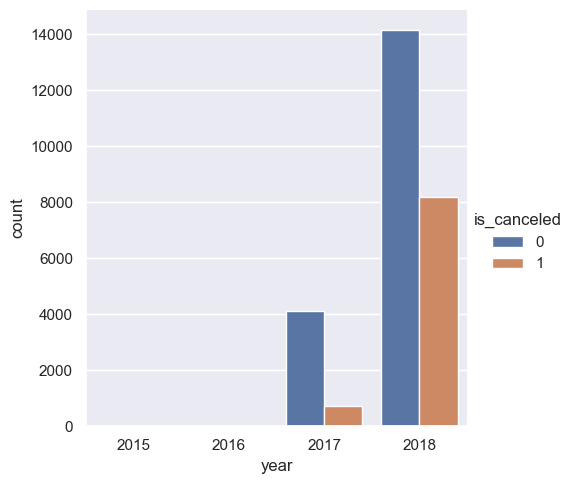

In [864]:
sns.catplot(x = 'month', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'day', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'year', kind = 'count', hue = 'is_canceled', data = data)

In [865]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

Looking for missing values and how to fill them

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  object        
 4   board_type           19045 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            26794 non-null  float64       
 11  purchase_type        22366 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat
weekend_nights,1.000000,0.172582,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571,-0.010714,0.027716,0.054034,0.060986,0.019542,0.038847
week_nights,0.172582,1.000000,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008,0.038114,-0.011855,0.026954,0.093326,0.018099,0.023021
n_adults,0.106355,0.105197,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098,0.024353,0.029621,0.074005,0.270896,-0.012657,0.088055
n_less_12,0.019048,0.009291,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208,-0.004160,0.018557,0.028867,0.276393,0.011050,0.028389
n_more_12,0.020736,0.020412,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083,-0.002169,0.020117,0.036370,0.278152,0.015990,0.023280
booked_tour,-0.033336,-0.052188,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230,-0.017864,0.001160,0.015890,0.039589,0.011106,-0.007997
n_requests,0.060688,0.046046,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765,0.109453,0.019879,0.056227,0.145410,0.020431,0.095061
lead_time,0.045434,0.149524,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932,0.138395,0.002840,0.143061,-0.106801,-0.047615,-0.002165
n_p_cacellation,-0.023784,-0.027565,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572,-0.034565,-0.013695,0.001002,-0.006050,0.015127,-0.014643
n_p_not_cacellation,-0.029500,-0.048246,-0.124772,-0.015822,-0.017378,0.068105,0.030748,-0.080618,0.473422,1.000000,0.545708,-0.120896,-0.062216,-0.011939,-0.006186,0.025911,-0.009804,0.022645,-0.062805


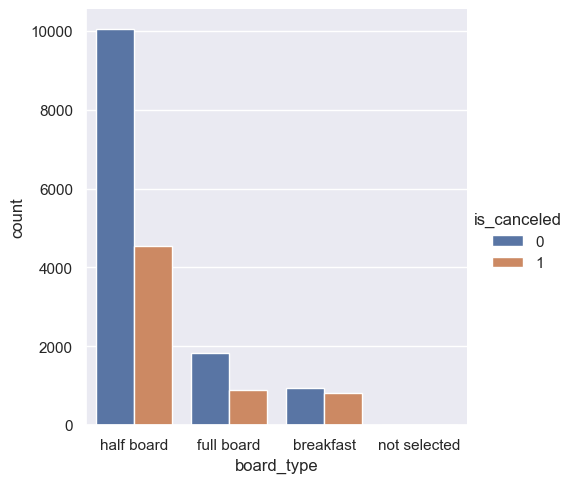

In [867]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

df['room_type_cat'] = df['room_type'].astype('category').cat.codes
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes
df[df.describe().columns].corr(method = 'pearson')

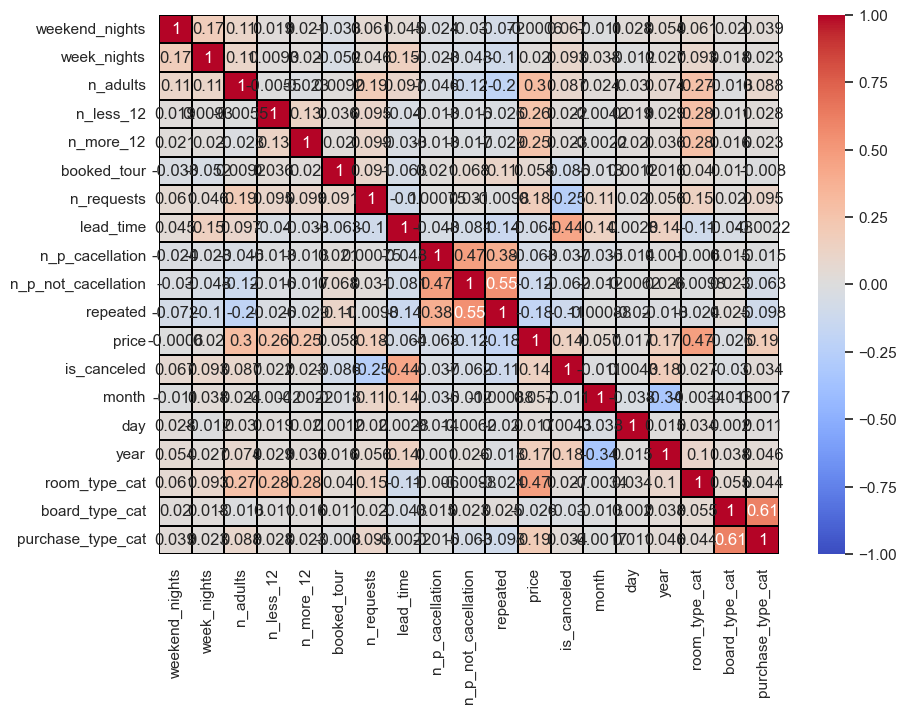

In [868]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')
# dont take correlation with target

half board      0.766133
full board      0.141612
breakfast       0.092045
not selected    0.000210
Name: board_type, dtype: float64


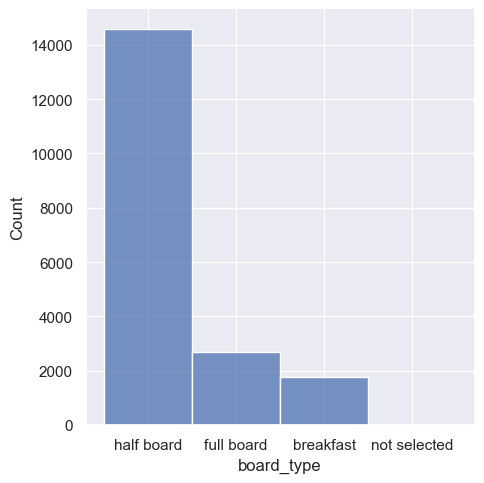

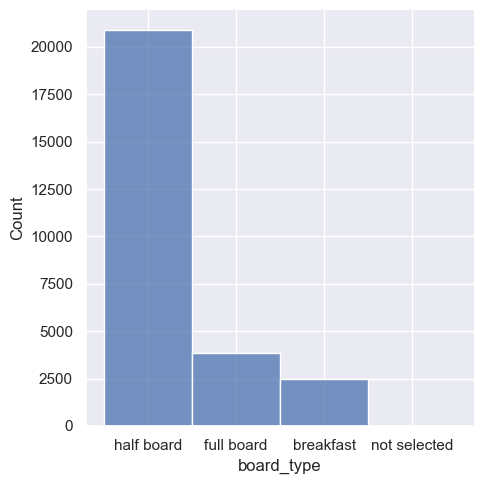

In [869]:
s = df.board_type.value_counts(normalize=True)
print(s)
sns.displot(df['board_type'], bins = 20)
missing = df['board_type'].isnull()
df.loc[missing,'board_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['board_type'], bins = 20)

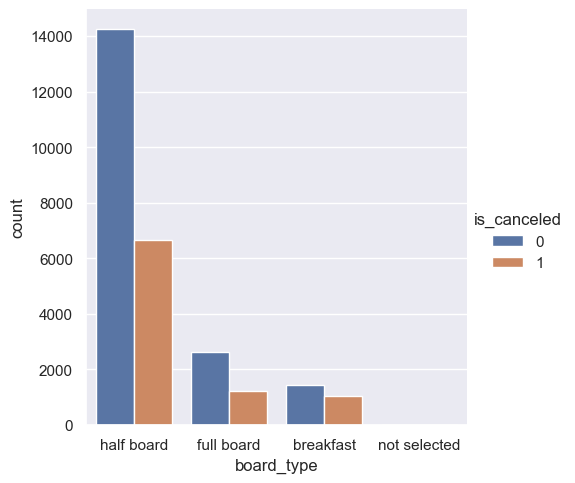

In [870]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

In [871]:
df.lead_time

0         34.0
1        365.0
2        148.0
3        502.0
4         32.0
         ...  
27208    106.0
27209     18.0
27210    147.0
27211      3.0
27212    328.0
Name: lead_time, Length: 27213, dtype: float64

0.0      0.036687
2.0      0.029932
3.0      0.017765
4.0      0.017019
5.0      0.016907
           ...   
374.0    0.000037
360.0    0.000037
382.0    0.000037
418.0    0.000037
410.0    0.000037
Name: lead_time, Length: 350, dtype: float64


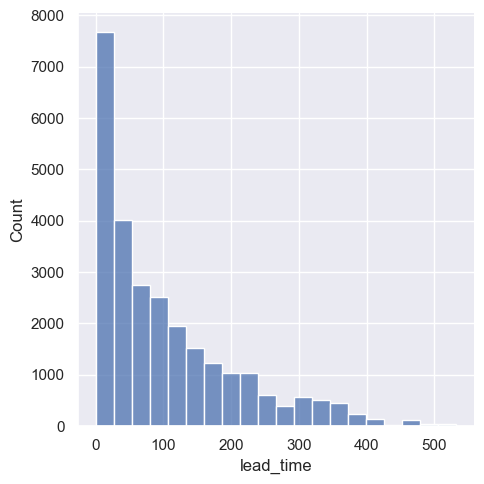

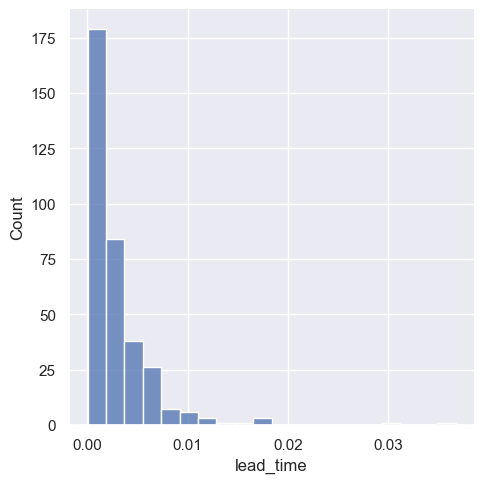

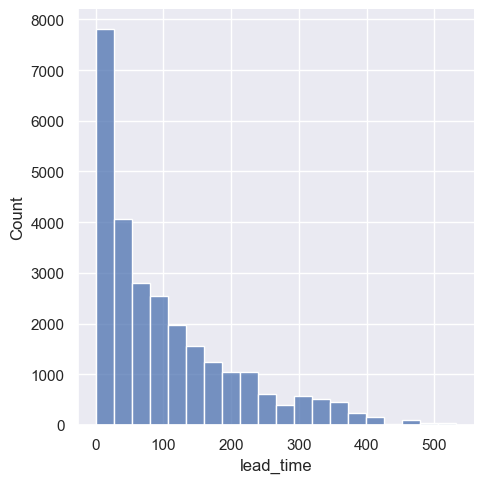

In [872]:
# correlations dont appear to be significant enough so we will fill lead_time in with mean.
s = df.lead_time.value_counts(normalize=True)
print(s)
sns.displot(df['lead_time'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['lead_time'].isnull()
df.loc[missing,'lead_time'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['lead_time'], bins = 20)

In [873]:
df['purchase_type'].unique()

array(['Online', nan, 'Offline', 'Corporate', 'Complementary', 'Aviation'],
      dtype=object)

Online           0.639632
Offline          0.290664
Corporate        0.055352
Complementary    0.010909
Aviation         0.003443
Name: purchase_type, dtype: float64


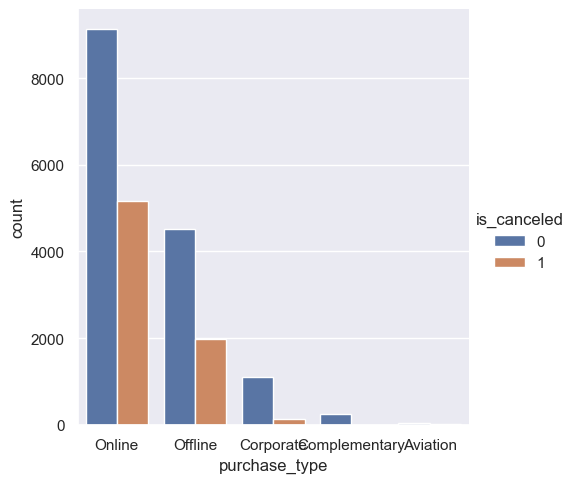

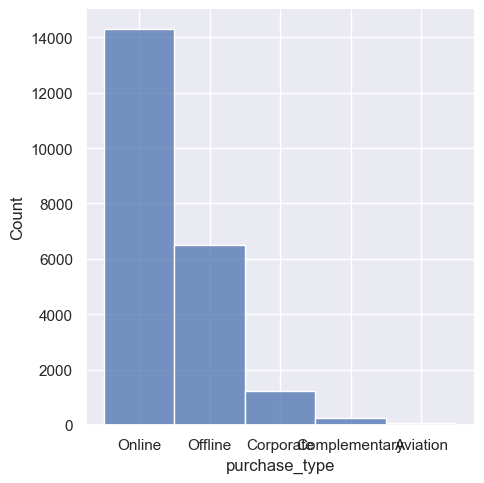

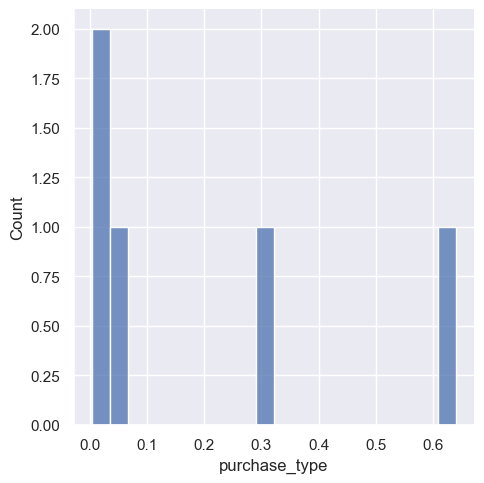

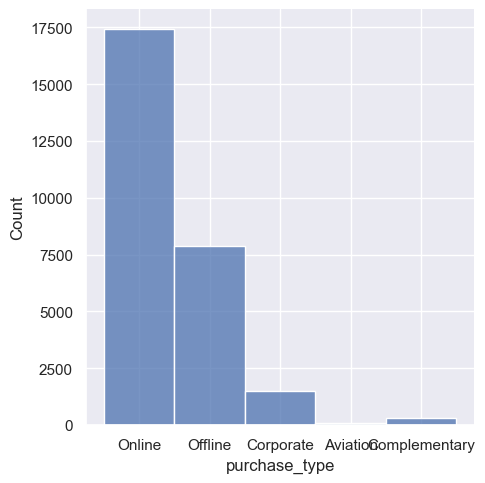

In [874]:
sns.catplot(x = 'purchase_type', kind = 'count', hue = 'is_canceled', data = df)
s = df.purchase_type.value_counts(normalize=True)
print(s)
sns.displot(df['purchase_type'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['purchase_type'].isnull()
df.loc[missing,'purchase_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['purchase_type'], bins = 20)

For class  Room_Type 1  the median is  114.5
For class  Room_Type 1  the mean is  115.8866113821142
and the number of missing values is  2634 out of  21084 rows
For class  Room_Type 2  the median is  105.85499999999999
For class  Room_Type 2  the mean is  108.92675438596494
and the number of missing values is  55 out of  511 rows
For class  Room_Type 3  the median is  100.75
For class  Room_Type 3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  Room_Type 4  the median is  147.65
For class  Room_Type 4  the mean is  145.54636477671886
and the number of missing values is  585 out of  4571 rows
For class  Room_Type 5  the median is  139.4
For class  Room_Type 5  the mean is  143.66717948717954
and the number of missing values is  24 out of  180 rows
For class  Room_Type 6  the median is  200.2
For class  Room_Type 6  the mean is  200.2548049921996
and the number of missing values is  100 out of  741 rows
For class  Room_Type 7  the median 

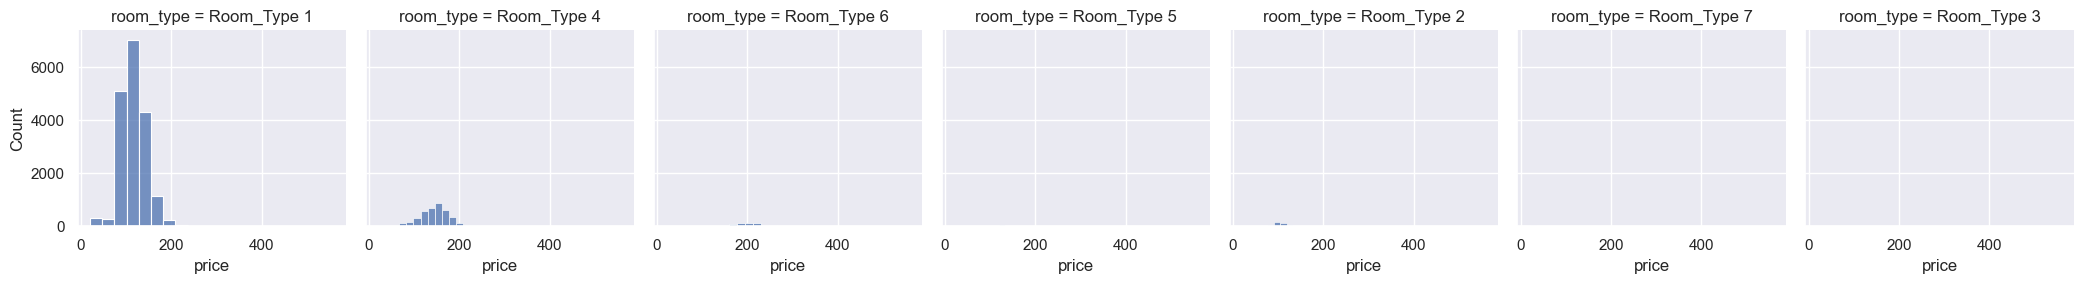

In [875]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows')
    
  
for room in df.room_type.unique():
    mu = df.loc[df['room_type']==room, 'price'].mean()
    sigma = df.loc[df['room_type']==room , 'price'].std()
    room_data = df['room_type']==room
    missing_price = df['price'].isnull()
    df.loc[missing_price & room_data, 'price'] = np.random.normal(mu, sigma, len(df[missing_price & room_data]))



218.900000    31
227.900000    27
197.300000    22
173.000000    22
206.300000    18
              ..
222.670786     1
170.070000     1
213.252663     1
223.760000     1
244.330000     1
Name: price, Length: 400, dtype: int64

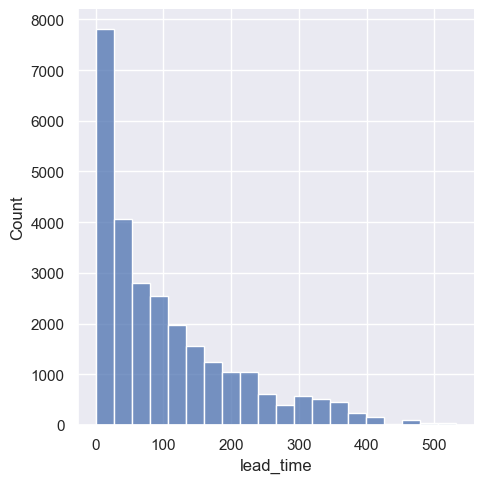

In [876]:
sns.displot(df['lead_time'],  bins = 20)
df[df['room_type']=='Room_Type 6'].price.value_counts()

Organizing data in different ways to look at what seems significant

In [877]:
df.lead_time.unique()
min_value = df['lead_time'].min()
max_value = df['lead_time'].max()
print(f'min_value: {min_value}')
print(f'max_value: {max_value}')
bins = np.linspace(min_value, max_value, 4)
print(bins)

min_value: 0.0
max_value: 532.0
[  0.         177.33333333 354.66666667 532.        ]


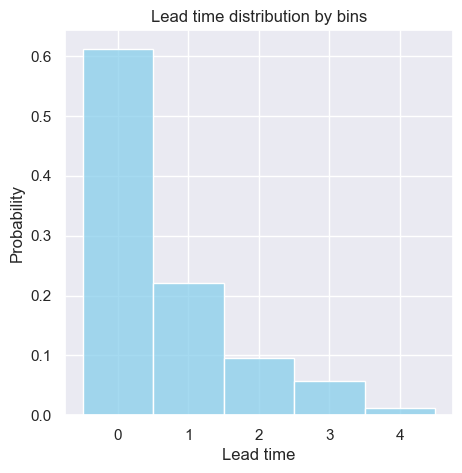

In [878]:
bins = [0, 100, 200, 300, 400, float('inf')]
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=False, include_lowest=True)

df['lead_time_bin'].value_counts().sort_index()

sns.histplot(data=df, x='lead_time_bin', color='skyblue', stat="probability", discrete=True)
plt.title('Lead time distribution by bins')
plt.xlabel('Lead time')
plt.ylabel('Probability')
plt.show()

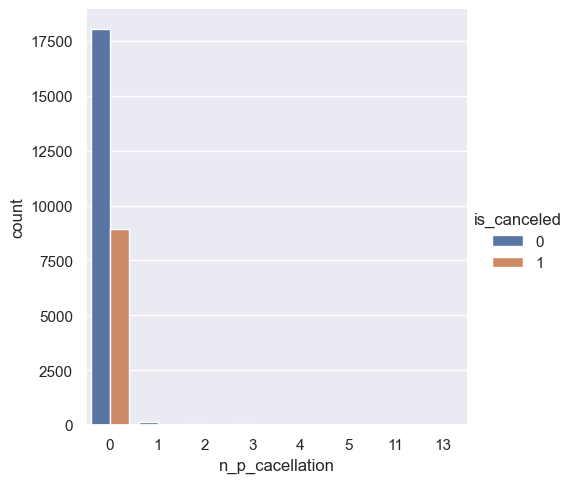

In [879]:
sns.catplot(x = 'n_p_cacellation', kind = 'count', hue = 'is_canceled', data = df)

In [880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  object        
 4   board_type           27213 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            27213 non-null  float64       
 11  purchase_type        27213 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

In [881]:
df['n_p_cacellation'].unique()

array([ 0,  1,  3,  2,  4, 11,  5, 13], dtype=int64)

In [882]:
df[df['weekend_nights']==6]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,price,date,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat,lead_time_bin
2879,INN27131,6,12,Room_Type 1,half board,1,0,0,0,1,...,136.328339,2018-11-18,1,11,18,2018,0,-1,-1,0
5236,INN02711,6,13,Room_Type 1,full board,2,0,0,0,0,...,90.460000,2018-03-10,1,3,10,2018,0,1,4,0
7579,INN00540,6,15,Room_Type 4,half board,1,0,0,0,0,...,148.060000,2018-03-30,1,3,30,2018,3,2,4,0
9577,INN14276,6,14,Room_Type 1,breakfast,1,0,0,0,0,...,90.910000,2018-02-05,1,2,5,2018,0,-1,-1,0
9659,INN02297,6,14,Room_Type 1,half board,1,0,0,0,0,...,117.200000,2018-11-20,1,11,20,2018,0,2,4,0
9916,INN32188,6,13,Room_Type 1,full board,2,0,0,0,0,...,121.980000,2018-08-20,1,8,20,2018,0,1,4,1
14725,INN19746,6,16,Room_Type 4,half board,1,0,0,0,1,...,118.930000,2018-03-03,1,3,3,2018,3,-1,4,0
16549,INN17939,6,15,Room_Type 1,half board,1,0,0,0,0,...,150.000000,2018-04-13,1,4,13,2018,0,2,2,0
20194,INN18161,6,12,Room_Type 1,half board,1,0,0,0,0,...,128.775590,2018-08-28,1,8,28,2018,0,-1,-1,1
20377,INN35200,6,14,Room_Type 1,half board,1,0,0,0,1,...,95.350000,2018-01-10,0,1,10,2018,0,-1,4,0


In [883]:
df['Num_Children'] = df['n_less_12'] + df['n_more_12']

In [884]:
df['Num_Children'].value_counts()

0     25168
1      1217
2       814
3        13
10        1
Name: Num_Children, dtype: int64

In [885]:
df[df['Num_Children']==10]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,date,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat,lead_time_bin,Num_Children
14485,INN06339,0,2,Room_Type 4,half board,2,6,4,0,1,...,2018-01-12,0,1,12,2018,3,-1,-1,0,10


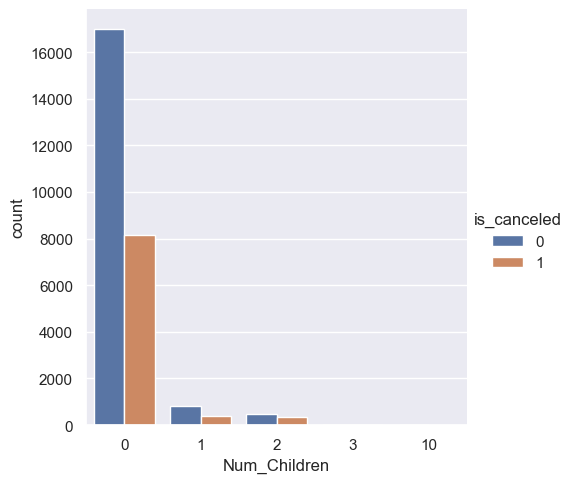

In [886]:
sns.catplot(x = 'Num_Children', kind = 'count', hue = 'is_canceled', data = df)

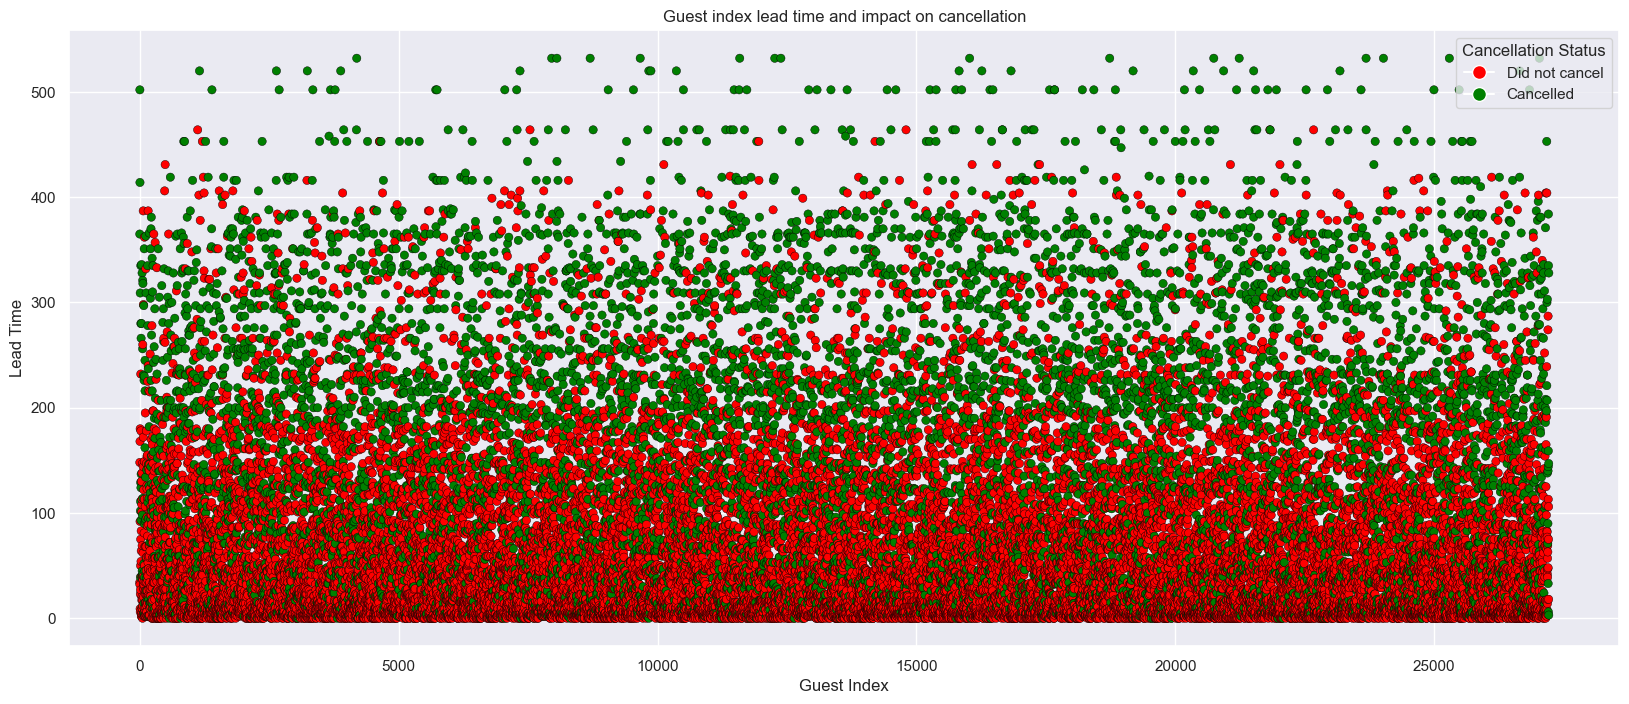

In [887]:
colordict = {0: 'red', 1: 'green'}
plt.figure(figsize=(20, 8))
scatter = plt.scatter(df.index, df['lead_time'], c=df['is_canceled'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('Guest index lead time and impact on cancellation')
plt.xlabel('Guest Index')
plt.ylabel('Lead Time')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Did not cancel',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Cancelled',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Cancellation Status', loc='upper right')
plt.show()

Prepare data for model by changing from string categories to integers

In [888]:

dict_year = {2015: 1, 2016: 2, 2017: 3, 2018: 4}

# Print the dictionary
print(dict_year)

# Remap the values of the dataframe
df['year_relabel'] = df['year'].map(dict_year)
df.year_relabel

dict_board = {'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}

# Print the dictionary
print(dict_board)

# Remap the values of the dataframe
df['board_type_relabel'] = df['board_type'].map(dict_board)
df.board_type_relabel

dict_purchase = {'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}

# Print the dictionary
print(dict_purchase)

# Remap the values of the dataframe
df['purchase_type_relabel'] = df['purchase_type'].map(dict_purchase)
df.purchase_type_relabel

dict_year = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}

# Print the dictionary
print(dict_room)

# Remap the values of the dataframe
df['room_type_relabel'] = df['room_type'].map(dict_room)

df.year.unique()

{2015: 1, 2016: 2, 2017: 3, 2018: 4}
{'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}
{'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}
{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}


array([2018, 2017, 2015, 2016], dtype=int64)

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     27213 non-null  object        
 1   weekend_nights         27213 non-null  int64         
 2   week_nights            27213 non-null  int64         
 3   room_type              27213 non-null  object        
 4   board_type             27213 non-null  object        
 5   n_adults               27213 non-null  int64         
 6   n_less_12              27213 non-null  int64         
 7   n_more_12              27213 non-null  int64         
 8   booked_tour            27213 non-null  int64         
 9   n_requests             27213 non-null  int64         
 10  lead_time              27213 non-null  float64       
 11  purchase_type          27213 non-null  object        
 12  n_p_cacellation        27213 non-null  int64         
 13  n

Looking for outliers

In [890]:
data_mean = df['price'].mean()
data_std = df['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,year,room_type_cat,board_type_cat,purchase_type_cat,lead_time_bin,Num_Children,year_relabel,board_type_relabel,purchase_type_relabel,room_type_relabel
13,INN15451,2,5,Room_Type 6,breakfast,2,1,1,0,0,...,2018,5,0,4,0,2,4,3,1,6
14,INN10191,1,3,Room_Type 6,half board,2,0,2,0,0,...,2018,5,2,4,1,2,4,1,1,6
98,INN21633,1,0,Room_Type 4,half board,3,0,0,0,1,...,2018,3,2,4,0,0,4,1,1,4
183,INN33956,1,2,Room_Type 4,full board,2,0,0,0,0,...,2018,3,-1,4,0,0,4,2,1,4
271,INN21089,2,5,Room_Type 6,breakfast,2,1,1,0,0,...,2018,5,0,4,1,2,4,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26586,INN14762,2,5,Room_Type 4,breakfast,3,0,0,0,2,...,2018,3,0,4,1,0,4,3,1,4
26888,INN28220,0,2,Room_Type 4,breakfast,3,0,0,1,2,...,2018,3,0,4,0,0,4,3,1,4
26968,INN21342,2,1,Room_Type 6,half board,2,0,2,0,0,...,2018,5,2,4,0,2,4,1,1,6
26975,INN31304,0,3,Room_Type 7,half board,2,1,1,0,2,...,2018,6,-1,-1,0,2,4,1,2,7


Scaled different attributes to further prepare for the classifier models - specifically the price attribute and lead time attribute.
We used the min-max for the price and z score normalization for the lead time. 

[8.04432077]
[560.]


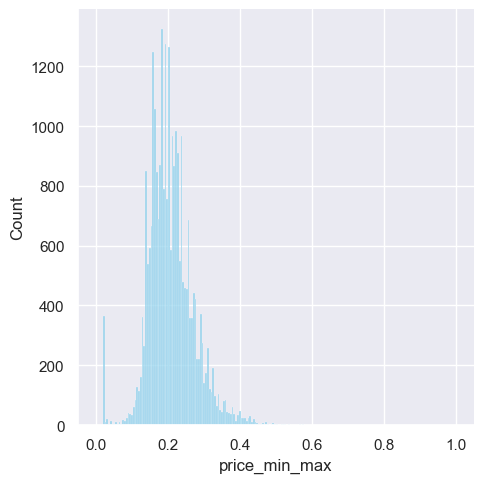

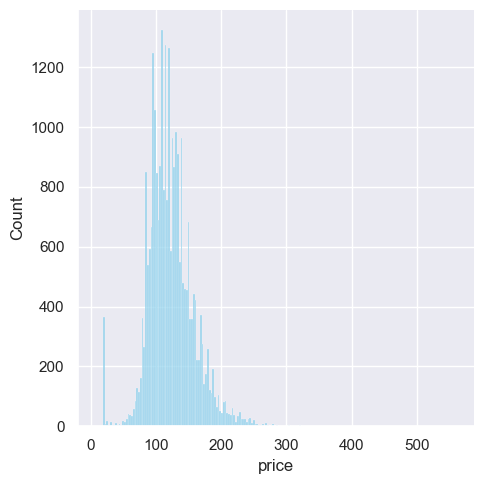

In [891]:

scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['price']))
df['price_min_max'] = scaler.transform(pd.DataFrame(df['price']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['price','price_min_max']].head()

sns.displot(df['price_min_max'], color='skyblue')
sns.displot(df['price'], color='skyblue')

0   -0.665417
1    2.534709
2    0.436741
3    3.859233
4   -0.684753
Name: lead_time_norm, dtype: float64


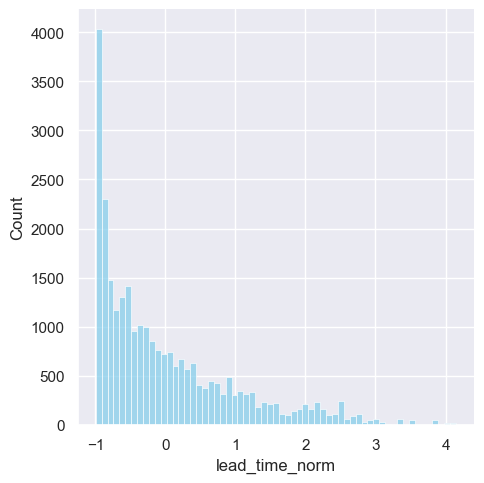

In [892]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['lead_time']))
df['lead_time_norm'] = z_scaler.transform(pd.DataFrame(df['lead_time']))
print(df['lead_time_norm'].head())
sns.displot(df['lead_time_norm'], color='skyblue')


PCA

In [893]:
df1 = df[['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time_norm', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price_min_max', 'room_type_relabel', 'board_type_relabel', 'purchase_type_relabel', 'year_relabel','month']]

In [894]:
df1.head()

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time_norm,n_p_cacellation,n_p_not_cacellation,repeated,price_min_max,room_type_relabel,board_type_relabel,purchase_type_relabel,year_relabel,month
0,1,5,2,0,0,0,2,-0.665417,0,0,0,0.181818,1,1,1,4,11
1,0,3,2,0,0,0,0,2.534709,0,0,0,0.157043,1,1,1,4,11
2,0,2,1,0,0,0,1,0.436741,0,0,0,0.234178,4,1,1,4,5
3,1,2,2,0,0,0,0,3.859233,0,0,0,0.215517,1,1,2,4,9
4,1,3,2,0,1,0,2,-0.684753,0,0,0,0.184717,4,1,2,3,10


In [895]:

pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='is_canceled')
df2 = pd.DataFrame(pca.transform(df1))


In [896]:
pca.explained_variance_ratio_

array([0.46381357, 0.15172695, 0.10975307, 0.09213377, 0.04584439,
       0.0370507 , 0.03114904, 0.02020393, 0.01859822, 0.01072806,
       0.0057683 , 0.0045447 , 0.00323545, 0.00307082, 0.00149237])

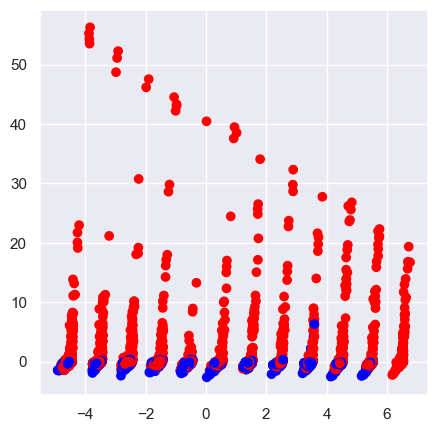

In [897]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df['is_canceled'].map(colordict))

Drop unnecessary columns from training data

In [898]:
# target = pd.DataFrame(df['is_canceled'])

train_data = df.drop(['ID', 'room_type_cat', 'board_type_cat', 'purchase_type_cat', 'room_type','board_type', 'purchase_type', 'lead_time', 'price', 'year', 'date'], axis=1)
train_data

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,n_p_cacellation,n_p_not_cacellation,repeated,...,month,day,lead_time_bin,Num_Children,year_relabel,board_type_relabel,purchase_type_relabel,room_type_relabel,price_min_max,lead_time_norm
0,1,5,2,0,0,0,2,0,0,0,...,11,28,0,0,4,1,1,1,0.181818,-0.665417
1,0,3,2,0,0,0,0,0,0,0,...,11,3,3,0,4,1,1,1,0.157043,2.534709
2,0,2,1,0,0,0,1,0,0,0,...,5,6,1,0,4,1,1,4,0.234178,0.436741
3,1,2,2,0,0,0,0,0,0,0,...,9,26,4,0,4,1,2,1,0.215517,3.859233
4,1,3,2,0,1,0,2,0,0,0,...,10,19,0,1,3,1,2,4,0.184717,-0.684753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,3,0,0,0,1,0,0,0,...,7,18,1,0,4,1,1,1,0.237478,0.030683
27209,0,4,2,0,0,0,1,0,0,0,...,2,24,0,0,4,1,1,1,0.190152,-0.820106
27210,0,2,2,0,0,0,0,0,0,0,...,4,15,1,0,4,1,2,1,0.175658,0.427073
27211,1,0,1,0,0,0,0,0,0,0,...,5,22,0,0,4,1,4,4,0.220952,-0.965127


Performed the cleaning on the test data as well

In [899]:
test_data = pd.read_csv("C:/Users/user/OneDrive - Bar-Ilan University - Students/Documents/Data_mining/Final_Project/hotels_test.csv")

In [900]:
test_data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,5/13/2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,8/30/2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,3/16/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,INN09811,0,3,Room_Type 1,NaN,2,0,0,0,1,326.0,NaN,0,0,0,NaN,9/21/2018
9068,INN33359,0,1,Room_Type 1,half board,1,0,0,0,0,10.0,Corporate,0,0,0,85.00,9/15/2017
9069,INN26843,0,3,Room_Type 1,half board,1,0,0,0,1,125.0,Online,0,0,0,130.10,05/04/2018
9070,INN14826,0,1,Room_Type 1,NaN,2,0,0,0,2,183.0,NaN,0,0,0,NaN,8/20/2018


In [901]:
data = test_data
invalid_date_rows = data[data['date'] == '2018-2-29']
data['date'] = df['date'].replace('2018-2-29','02/28/2018')
data['date'].unique()
data['date']= pd.to_datetime(data['date'], format='%m/%d/%Y',errors='coerce')
data['date'].dtype
test_data['month'] = data['date'].dt.month
test_data['day'] = data['date'].dt.day
test_data['year'] = data['date'].dt.year
test_data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,month,day,year
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,2018-11-28,11,28,2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,2018-11-03,11,3,2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,2018-05-06,5,6,2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,2018-09-26,9,26,2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,2017-10-19,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,INN09811,0,3,Room_Type 1,NaN,2,0,0,0,1,326.0,NaN,0,0,0,NaN,2018-12-15,12,15,2018
9068,INN33359,0,1,Room_Type 1,half board,1,0,0,0,0,10.0,Corporate,0,0,0,85.00,2018-08-27,8,27,2018
9069,INN26843,0,3,Room_Type 1,half board,1,0,0,0,1,125.0,Online,0,0,0,130.10,2017-08-14,8,14,2017
9070,INN14826,0,1,Room_Type 1,NaN,2,0,0,0,2,183.0,NaN,0,0,0,NaN,2018-09-10,9,10,2018


In [902]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   9072 non-null   object        
 1   weekend_nights       9072 non-null   int64         
 2   week_nights          9072 non-null   int64         
 3   room_type            9072 non-null   object        
 4   board_type           6355 non-null   object        
 5   n_adults             9072 non-null   int64         
 6   n_less_12            9072 non-null   int64         
 7   n_more_12            9072 non-null   int64         
 8   booked_tour          9072 non-null   int64         
 9   n_requests           9072 non-null   int64         
 10  lead_time            8947 non-null   float64       
 11  purchase_type        7461 non-null   object        
 12  n_p_cacellation      9072 non-null   int64         
 13  n_p_not_cacellation  9072 non-nul

In [903]:
s = test_data.board_type.value_counts(normalize=True)
missing = test_data['board_type'].isnull()
test_data.loc[missing,'board_type'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)

In [904]:
s = test_data.lead_time.value_counts(normalize=True)
missing = test_data['lead_time'].isnull()
test_data.loc[missing,'lead_time'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)


In [905]:

s = test_data.purchase_type.value_counts(normalize=True)
missing = test_data['purchase_type'].isnull()
test_data.loc[missing,'purchase_type'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)

In [906]:
for room in test_data.room_type.unique():
    mu = test_data.loc[test_data['room_type']==room, 'price'].mean()
    sigma = test_data.loc[test_data['room_type']==room , 'price'].std()
    room_data = test_data['room_type']==room
    missing_price = test_data['price'].isnull()
    test_data.loc[missing_price & room_data, 'price'] = np.random.normal(mu, sigma, len(test_data[missing_price & room_data]))

In [907]:
test_data.lead_time.unique()
min_value = test_data['lead_time'].min()
max_value = test_data['lead_time'].max()

bins = np.linspace(min_value, max_value, 4)

labels = ['close', 'medium', 'far']
test_data['bins'] = pd.cut(test_data['lead_time'], bins=bins, labels=labels, 
                    include_lowest=True)


In [908]:
bins = [0, 100, 200, 300, 400, float('inf')]
test_data['lead_time_bin'] = pd.cut(test_data['lead_time'], bins=bins, labels=False, include_lowest=True)
test_data['lead_time_bin'].value_counts().sort_index()

0    5659
1    1912
2     870
3     534
4      97
Name: lead_time_bin, dtype: int64

In [909]:
test_data['Num_Children'] = test_data['n_less_12'] + test_data['n_more_12']

In [910]:
dict_year = {2015: 1, 2016: 2, 2017: 3, 2018: 4}

# Print the dictionary
print(dict_year)

# Remap the values of the dataframe
test_data['year_relabel'] = test_data['year'].map(dict_year)
test_data.year_relabel

dict_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}

# Print the dictionary
print(dict_room)

# Remap the values of the dataframe
test_data['room_type_relabel'] = test_data['room_type'].map(dict_room)
test_data.room_type_relabel

dict_board = {'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}

# Print the dictionary
print(dict_board)

# Remap the values of the dataframe
test_data['board_type_relabel'] = test_data['board_type'].map(dict_board)
test_data.board_type_relabel

dict_purchase = {'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}

# Print the dictionary
print(dict_purchase)

# Remap the values of the dataframe
test_data['purchase_type_relabel'] = test_data['purchase_type'].map(dict_purchase)
test_data.purchase_type_relabel

{2015: 1, 2016: 2, 2017: 3, 2018: 4}
{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
{'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}
{'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}


0       1
1       1
2       2
3       2
4       1
       ..
9067    2
9068    3
9069    1
9070    2
9071    2
Name: purchase_type_relabel, Length: 9072, dtype: int64

In [911]:
data_mean = test_data['price'].mean()
data_std = test_data['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
test_data.loc[(df['price'] > upper_bound) | (test_data['price'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,month,day,year,bins,lead_time_bin,Num_Children,year_relabel,room_type_relabel,board_type_relabel,purchase_type_relabel
13,INN00481,0,2,Room_Type 1,half board,1,0,0,0,0,...,4,16,2018,medium,2,0,4,1,1,1
14,INN31132,0,2,Room_Type 4,half board,1,0,0,0,0,...,9,22,2018,close,0,0,4,4,1,4
98,INN17761,2,4,Room_Type 1,half board,2,0,0,0,0,...,8,15,2018,close,1,0,4,1,1,1
183,INN10205,1,0,Room_Type 1,half board,2,0,0,0,0,...,12,30,2018,close,0,0,4,1,1,1
271,INN06964,2,2,Room_Type 1,full board,2,0,0,0,2,...,10,23,2018,close,0,0,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,INN26125,2,2,Room_Type 1,full board,2,0,0,0,2,...,9,23,2017,close,0,0,3,1,2,1
8798,INN18203,0,1,Room_Type 1,full board,2,0,0,0,1,...,4,30,2018,close,1,0,4,1,2,2
8851,INN01788,1,3,Room_Type 7,half board,2,1,1,0,0,...,8,2,2018,close,0,2,4,7,1,2
8890,INN23468,0,2,Room_Type 1,breakfast,1,0,0,0,0,...,9,25,2018,close,0,0,4,1,3,2


In [912]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(test_data['price']))
test_data['price_min_max'] = scaler.transform(pd.DataFrame(test_data['price']))

test_data[['price','price_min_max']].head()


,price,price_min_max
0,141.590000,0.509375
1,90.560000,0.406517
2,260.762682,0.749583
3,159.117885,0.544705
4,99.050000,0.423630


In [913]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(test_data['lead_time']))
test_data['lead_time_norm'] = z_scaler.transform(pd.DataFrame(test_data['lead_time']))


In [914]:
test_data = test_data.drop(['ID', 'room_type','year','purchase_type','price','board_type', 'lead_time','date'], axis=1)       

In [915]:
X = train_data.drop(['is_canceled'], axis=1)
y = train_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [ ]:
def gaussian_classifier(X_train, X_test, y_train, y_test):
    clf_b = GaussianNB()
    clf_b.fit(X_train, y_train)
    y_pred = clf_b.predict(X_test)
    display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
    print(f"accuracy of model : {metrics.accuracy_score(y_test, y_pred)}")
    print(f"precision of model : {metrics.precision_score(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    y_probs_b = clf_b.predict_proba(X_test) # probability prediction
    fpr_b, tpr_b, _ = metrics.roc_curve(y_test, y_probs_b[:,1])
    auc_b = metrics.auc(fpr_b, tpr_b)
    plt.figure()
    plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve for gaussian_NB (area = %0.2f)' %  auc_b)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate  (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()

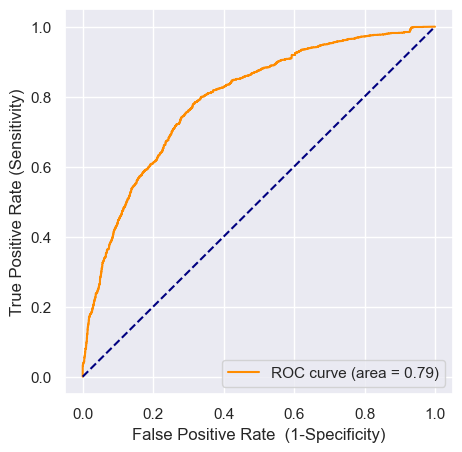

In [1052]:
y_probs_b = clf_b.predict_proba(X_test) # probability prediction
fpr_b, tpr_b, _ = metrics.roc_curve(y_test, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

In [1054]:
# find best parameters for the decision tree classifier

clf = DecisionTreeClassifier()
#parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='precision')


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

Best parameters found:  {'min_samples_leaf': 10, 'min_samples_split': 2}


In [1056]:
def decision_tree_classifier(X_train, X_test, y_train, y_test):
    clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=17,
                                  min_samples_split=2, min_samples_leaf=10, random_state=42) 

    clf2 = clf2.fit(X_train,y_train)
    y_train_pred2 = clf2.predict(X_train)
    y_test_pred = clf2.predict(X_test)
    print(f"accuracy of model : {metrics.accuracy_score(y_test, y_test_pred)}")
    print(f"precision of model : {metrics.precision_score(y_test, y_test_pred)}")
    pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred))
    train_scores, test_scores = [], []
    train_precision,test_precision=[],[]


    for k in range(2, 50):
        clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                      max_depth=k, random_state=42) 
        clf3.fit(X_train, y_train)
        y_train_pred = clf3.predict(X_train)
        y_test_pred=clf3.predict(X_test)
        train_scores.append(clf3.score(X_train, y_train))
        test_scores.append(clf3.score(X_test, y_test))
        train_precision.append(metrics.precision_score(y_train,y_train_pred))
        test_precision.append(metrics.precision_score(y_test,y_test_pred))

    fig, ax = plt.subplots(figsize=(10, 6))

    #ax.plot(range(2, 50), train_scores, linestyle='-', color='blue')
    #ax.plot(range(2, 50), test_scores, linestyle='--', color='orange')
    ax.plot(range(2, 50), train_precision, linestyle='-', color='black')
    ax.plot(range(2, 50), test_precision, linestyle='--', color='grey')

    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Precision')
    ax.set_title('Effect of Max Depth on Decision Tree Precision')

    ax.legend(['Training Precision', 'Test Precision'], loc='lower right')
    ax.grid()

    plt.show()
    
    y_probs_a = clf_a.predict_proba(X_test) # probability prediction
    fpr_a, tpr_a, threshold = metrics.roc_curve(y_test, y_probs_a[:,1])
    auc_a = metrics.auc(fpr_a, tpr_a)
    plt.figure()
    plt.plot(fpr_a, tpr_a, color='green', label='ROC curve decision tree (area = %0.2f)' %  auc_a)
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate  (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()
    
    cm = confusion_matrix(y_test, y_test_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [1057]:
def svm_classifier(X_train, X_test, y_train, y_test):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    clf_a = svm.SVC(kernel='rbf', C=0.9, probability=True)
    clf_a.fit(X_train, y_train)
    y_pred = clf_a.predict(X_test)
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
    print(f"accuracy of model : {metrics.accuracy_score(y_test, y_pred)}")
    print(f"precision of model : {metrics.precision_score(y_test, y_pred)}")


    y_probs_a = clf_a.predict_proba(X_test) # probability prediction
    fpr_a, tpr_a, threshold = metrics.roc_curve(y_test, y_probs_a[:,1])
    auc_a = metrics.auc(fpr_a, tpr_a)
    plt.figure()
    plt.plot(fpr_a, tpr_a, color='yellow', label='ROC curve SVM (area = %0.2f)' %  auc_a)
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate  (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()
    roc = pd.DataFrame({'fpr': fpr_a, 'tpr': tpr_a, 't': threshold})
    roc.head(10)
    roc[roc['tpr']>0.75].head(10)
    cm = confusion_matrix(y_test, y_test_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [1059]:
def ada_boost_classifier(X_train, X_test, y_train, y_test):
    base_estimator = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=17,
                                      min_samples_split=2, min_samples_leaf=10, random_state=42) 
    ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=1)

    # Fit the AdaBoostClassifier
    ada_boost.fit(X_train, y_train)
    y_pred = ada_boost.predict(X_test)
    
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
    print(f"accuracy of model : {metrics.accuracy_score(y_test, y_pred)}")
    print(f"precision of model : {metrics.precision_score(y_test, y_pred)}")
    
    y_probs_a = clf_a.predict_proba(X_test) # probability prediction
    fpr_a, tpr_a, threshold = metrics.roc_curve(y_test, y_probs_a[:,1])
    auc_a = metrics.auc(fpr_a, tpr_a)
    plt.figure()
    plt.plot(fpr_a, tpr_a, color='red', label='ROC curve SVM (area = %0.2f)' %  auc_a)
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate  (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()
    roc = pd.DataFrame({'fpr': fpr_a, 'tpr': tpr_a, 't': threshold})
    roc.head(10)
    roc[roc['tpr']>0.75].head(10)
    cm = confusion_matrix(y_test, y_test_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

print("Decision tree classifier: ")
decision_tree_classifier(X_train, X_test, y_train, y_test)

print("Gaussian classifier: ")
gaussian_classifier(X_train, X_test, y_train, y_test)

print("Svm classifier:")
svm_classifier(X_train, X_test, y_train, y_test)

print("Ada_boost classifier:")
ada_boost_classifier(X_train, X_test, y_train, y_test)

In [ ]:
# regular smote

smote_oversample = SMOTE(random_state = 1)
smote_X, smote_y = smote_oversample.fit_resample(X, y)

smote_data = pd.concat([pd.DataFrame(smote_X),pd.DataFrame(smote_y, columns =['is_canceled'])], axis =1)
print(smote_data['is_canceled'].value_counts())

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(smote_X, smote_y, test_size=0.25, random_state=42) 

print("Decision tree classifier: ")
decision_tree_classifier(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

print("Gaussian classifier: ")
gaussian_classifier(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

print("Svm classifier")
svm_classifier(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

print("Ada_boost classifier:")
ada_boost_classifier(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

In [ ]:
# Smote k split

smote_oversample_k = SMOTE(random_state = 1, k_neighbors = 5)
smote_X_k, smote_y_k = smote_oversample_k.fit_resample(X, y)

X_train_smote_k, X_test_smote_k, y_train_smote_k, y_test_smote_k = train_test_split(smote_X_k, smote_y_k, test_size=0.25, random_state=42)


print("Decision tree classifier: ")
decision_tree_classifier(X_train_smote_k, X_test_smote_k, y_train_smote_k, y_test_smote_k)

print("Gaussian classifier: ")
gaussian_classifier(X_train_smote_k, X_test_smote_k, y_train_smote_k, y_test_smote_k)

print("Svm classifier")
svm_classifier(X_train_smote_k, X_test_smote_k, y_train_smote_k, y_test_smote_k)

print("Ada_boost classifier:")
ada_boost_classifier(X_train_smote_k, X_test_smote_k, y_train_smote_k, y_test_smote_k)

In [ ]:
smote_data = pd.concat([pd.DataFrame(smote_X_k),pd.DataFrame(smote_y_k, columns =['is_canceled'])], axis =1)
print(smote_data['is_canceled'].value_counts())

In [ ]:
# over and under smote

over = SMOTE(sampling_strategy=0.5, random_state = 1)
under = RandomUnderSampler(sampling_strategy=1, random_state = 1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
smote_X_o_u, smote_y_o_u = pipeline.fit_resample(X, y)

X_train_smote_o_u, X_test_smote_o_u, y_train_smote_o_u, y_test_smote_o_u = train_test_split(smote_X_o_u, smote_y_o_u, test_size=0.25, random_state=42)



print("Decision tree classifier: ")
decision_tree_classifier(X_train_smote_o_u, X_test_smote_o_u, y_train_smote_o_u, y_test_smote_o_u)

print("Gaussian classifier: ")
gaussian_classifier(X_train_smote_o_u, X_test_smote_o_u, y_train_smote_o_u, y_test_smote_o_u)

print("Svm classifier")
svm_classifier(X_train_smote_o_u, X_test_smote_o_u, y_train_smote_o_u, y_test_smote_o_u)

print("Ada_boost classifier:")
ada_boost_classifier(X_train_smote_o_u, X_test_smote_o_u, y_train_smote_o_u, y_test_smote_o_u)

In [ ]:
oversample = ADASYN(random_state = 1)
adasyn_X, adasyn_y = oversample.fit_resample(X, y)

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(adasyn_X, adasyn_y, test_size=0.25, random_state=42)

print("Decision tree classifier: ")
decision_tree_classifier(X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)

print("Gaussian classifier: ")
gaussian_classifier(X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)

print("Svm classifier")
svm_classifier(X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)

print("Ada_boost classifier:")
ada_boost_classifier(X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)

In [ ]:
# after we calculate the best parameters:

oversample = ADASYN(random_state = 1, n_neighbors = 3)
adasyn_X_n, adasyn_y_n = oversample.fit_resample(X, y)
X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n = train_test_split(adasyn_X_n, adasyn_y_n, test_size=0.25, random_state=42)

print("Decision tree classifier: ")
decision_tree_classifier(X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n)

oversample = ADASYN(random_state = 1, n_neighbors = 3)
adasyn_X_n, adasyn_y_n = oversample.fit_resample(X, y)
X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n = train_test_split(adasyn_X_n, adasyn_y_n, test_size=0.25, random_state=42)

print("Gaussian classifier: ")
gaussian_classifier(X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n)

oversample = ADASYN(random_state = 1, n_neighbors = 3)
adasyn_X_n, adasyn_y_n = oversample.fit_resample(X, y)
X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n = train_test_split(adasyn_X_n, adasyn_y_n, test_size=0.25, random_state=42)

print("Svm classifier")
svm_classifier(X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n)

oversample = ADASYN(random_state = 1, n_neighbors = 3)
adasyn_X_n, adasyn_y_n = oversample.fit_resample(X, y)
X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n = train_test_split(adasyn_X_n, adasyn_y_n, test_size=0.25, random_state=42)

print("Ada_boost classifier:")
ada_boost_classifier(X_train_adasyn_n, X_test_adasyn_n, y_train_adasyn_n, y_test_adasyn_n)

In [1049]:
# clf = DecisionTreeClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(clf, X, y, scoring='precision', cv=cv)
# print('Mean precision: %.3f' % np.mean(scores))

# steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
# pipeline = Pipeline(steps=steps)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
# print('Mean precision: %.3f' % np.mean(scores))

# clf = DecisionTreeClassifier()
# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=1)
# steps = [('over', over), ('under', under), ('model', clf)]
# pipeline = Pipeline(steps=steps)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
# print('Mean precision: %.3f' % np.mean(scores))



# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# y_pred = np.zeros(y.shape)
# for train_index, test_index in cv.split(X, y):
#     clone_pipeline = clone(pipeline)  
#     X_train_fold, y_train_fold = X.loc[train_index], y.loc[train_index]
#     X_test_fold = X.loc[test_index]
#     clone_pipeline.fit(X_train_fold, y_train_fold)
#     y_pred[test_index] = clone_pipeline.predict(X_test_fold)
#     print(y_pred[test_index])

# cm = confusion_matrix(y, y_pred)

# plt.figure(figsize=(7,5))
# sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.title('Confusion Matrix', size = 15)
# plt.show()

# mean_score = []
# for k in range(1,50,2):
#     model = DecisionTreeClassifier()
#     over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
#     under = RandomUnderSampler(sampling_strategy=1)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = Pipeline(steps=steps)
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
#     score = np.mean(scores)
#     mean_score.append(score)
#     print('k=%d, Mean precision: %.3f' % (k, score))

# over = SMOTE(sampling_strategy=0.5, random_state = 1, k_neighbors=range(1,50,2)[np.argmax(mean_score)])
# under = RandomUnderSampler(sampling_strategy=1, random_state = 1)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# smote2_X, smote2_y = pipeline.fit_resample(X, y)
# smote2_data = pd.concat([pd.DataFrame(smote2_X),pd.DataFrame(smote2_y, columns =['y'])], axis =1)
# print(smote2_data['y'].value_counts())
# plot_data(smote2_data)


classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian NB': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

for classifier_name, classifier in classifiers.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores_without_smote = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
    print(f'{classifier_name} Without SMOTE, Mean precision: %.3f' % np.mean(scores_without_smote))
    
    steps = [('over', SMOTE(random_state = 1)), ('model', classifier)]
    pipeline = Pipeline(steps=steps)
    scores_with_smote = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
    print(f'{classifier_name} With SMOTE, Mean precision: %.3f' % np.mean(scores_with_smote))

    steps = [('over', SMOTE(random_state = 1, k_neighbors = 3)), ('model', classifier)]
    pipeline = Pipeline(steps=steps)
    scores_with_smote = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
    print(f'{classifier_name} With SMOTE k-neighbors, Mean precision: %.3f' % np.mean(scores_with_smote))

    over = SMOTE(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=1)
    steps = [('over', over), ('under', under), ('model', classifier)]
    pipeline = Pipeline(steps=steps)
    scores_with_smote_over_under = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
    print(f'{classifier_name} With SMOTE over and under, Mean precision: %.3f' % np.mean(scores_with_smote))

Decision Tree Without SMOTE, Mean precision: 0.747
Decision Tree With SMOTE, Mean precision: 0.724
Decision Tree With SMOTE k-neighbors, Mean precision: 0.727
Decision Tree With SMOTE over and under, Mean precision: 0.727
Gaussian NB Without SMOTE, Mean precision: 0.370
Gaussian NB With SMOTE, Mean precision: 0.359
Gaussian NB With SMOTE k-neighbors, Mean precision: 0.359
Gaussian NB With SMOTE over and under, Mean precision: 0.359
SVM Without SMOTE, Mean precision: 0.733
SVM With SMOTE, Mean precision: 0.618
SVM With SMOTE k-neighbors, Mean precision: 0.618
SVM With SMOTE over and under, Mean precision: 0.618


In [1050]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian NB': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

for classifier_name, classifier in classifiers.items():
    mean_score = []
    print(classifier_name)
    for k in range(1,50,2):
        model = classifier
        over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
        under = RandomUnderSampler(sampling_strategy=1)
        steps = [('over', over), ('under', under), ('model', model)]
        pipeline = Pipeline(steps=steps)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
        score = np.mean(scores)
        mean_score.append(score)
        print('k=%d, Mean precision: %.3f' % (k, score))

Decision Tree
k=1, Mean precision: 0.677
k=3, Mean precision: 0.672
k=5, Mean precision: 0.675
k=7, Mean precision: 0.671
k=9, Mean precision: 0.673
k=11, Mean precision: 0.672
k=13, Mean precision: 0.672
k=15, Mean precision: 0.675
k=17, Mean precision: 0.671
k=19, Mean precision: 0.670
k=21, Mean precision: 0.672
k=23, Mean precision: 0.669
k=25, Mean precision: 0.671
k=27, Mean precision: 0.671
k=29, Mean precision: 0.675
k=31, Mean precision: 0.674


KeyboardInterrupt: 

In [ ]:
def get_n_neighbors(classifier):
    param_grid = {
        'over__n_neighbors': [3, 5, 10],
        'model__max_depth': [3, 5, None],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10],
    }

    steps = [('over', ADASYN(random_state = 1)), ('model', classifier)]
    pipeline = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='precision', verbose=2, n_jobs=-1)
    grid_search.fit(X, y)

    print('Best parameters:', grid_search.best_params_)
    print('Best precision: %.3f' % grid_search.best_score_)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian NB': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

for classifier_name, classifier in classifiers.items():
    get_n_neighbors(classifier)


In [ ]:
# Binarizing everything

dummies_col = []
for col in train_data:
    unique_values = len(train_data[col].unique())
    if 2 < unique_values < 9:
        print(col)
        dummies_col.append(col)

X_dummies = pd.get_dummies(data=X, columns=dummies_col).astype(float)

X_dummies.head()

X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42) 


In [ ]:
def compare_dummy_to_regular_models(clf_a, clf_b, X_dummies):
    X_data = X.to_numpy()
    X_dummies = X_dummies.to_numpy()

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cm_a, cm_b = [], []
    accuracy_a, accuracy_b = [], []
    recall_a, recall_b = [], []
    precision_a, precision_b = [], []

    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf_a.fit(X_train, y_train)
        clf_b.fit(X_train_d, y_train)

        y_pred_a = clf_a.predict(X_test)
        y_pred_b = clf_b.predict(X_test_d)

        cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
        cm_b.append(metrics.confusion_matrix(y_test, y_pred_b))
        accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
        accuracy_b.append(metrics.accuracy_score(y_test, y_pred_b))
        recall_a.append(metrics.recall_score(y_test, y_pred_a))
        recall_b.append(metrics.recall_score(y_test, y_pred_b))
        precision_a.append(metrics.precision_score(y_test, y_pred_a))
        precision_b.append(metrics.precision_score(y_test, y_pred_b))
    results = {
        'Accuracy_noraml': accuracy_a,
        'Accuracy_Binary': accuracy_b,
        'Recall_noraml': recall_a,
        'Recall_Binary': recall_b,
        'Precision_noraml': precision_a,
        'Precision_Binary': precision_b
    }

    results_df = pd.DataFrame(results)
    mean_values = results_df.mean()
    results_df.loc['Mean'] = mean_values
    results_df



#Compare between 2 models for decision trees:
clf_a_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf_b_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=42)

compare_dummy_to_regular_models(clf_a_decision_tree, clf_b_decision_tree, X_dummies)


In [ ]:
#Compare between 2 models for gaussian naive bayes:
clf_a_gauss_nb = GaussianNB()
clf_b_gauss_nb = GaussianNB()
compare_dummy_to_regular_models(clf_a_gauss_nb, clf_b_gauss_nb, X_dummies)

In [ ]:
#Compare between 2 models for svm:
clf_a_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_b_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
compare_dummy_to_regular_models(clf_a_svm, clf_b_svm, X_dummies)

In [ ]:
#Compare between 2 models for adaboost:
base_estimator = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=17,
                                      min_samples_split=2, min_samples_leaf=10, random_state=42) 

clf_a_ada =  AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=1)
clf_b_ada =  AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=1)
compare_dummy_to_regular_models(clf_a_ada, clf_b_ada, X_dummies)

In [807]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(smote_X, smote_y, test_size=0.25, random_state=42) 

clf = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf = clf.fit(X_train_smote,y_train_smote)

# Predict the label
y_pred = clf.predict(X_test_smote)

In [713]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       haa95532_0         128 KB
    cairo-1.16.0               |       he04af86_2         1.5 MB
    certifi-2024.7.4           |   py39haa95532_0         159 KB
    click-8.1.7                |   py39haa95532_0         164 KB
    expat-2.6.2                |       hd77b12b_0         260 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.78.4                |       hd77b12b_0         491 KB
    glib-tools-2.78.4          |       hd77b12b_0          91 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py310_0
  - defaults/win-64::black==22.6.0=py39haa95532_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/win-64::dask==2022.7.0=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - defaults/win-64::distributed==2022.7.0=py39haa95532_0
  - defaults/noarch::flask==1.1.2=pyhd3eb1b0_0
  - defaults/noarch::intake==0.6.5=pyhd3eb1b0_0
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/win-64::spyder==5.2.2=py39haa95532_1
